# Análisis Sísmico

In [1]:
#Importar las librerías necesarias
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy
sys.path.append(os.getcwd())
from lib import etabs_utils as etb
from lib import sismo_utils as sis
from lib import notebook_utils as ntb
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display
 

In [2]:
_,SapModel = etb.connect_to_etabs()

In [3]:
sismo = ntb.Sismo()

# Parámetros de Sitio

## Zonificación
![Factor de Zonifiación](./images/factor_zona.png)

## Factor de Suelo
![Factor de Suelo](./images/factor_suelo.png)


## Periodos del suelo
![Periodos del Suelo](./images/periodos_suelo.png)

## Sistema Estructural
![Sistema Estructural](./images/sistemas_estructurales.png)

## Factor de Amplificación sísmica
![Factor de Amplificacion Sísmica](./images/amplificacion_sismica.png)

## Factor de Importancia
![Factor de Importancia](./images/factor_importancia.png)

In [4]:
sismo.ubicacion()

In [5]:
sismo.parametros_e30()

# Irregularidades

In [6]:
sismo.irregularidades_e30()

# Parámetros Sísmicos

In [7]:
sismo.show_params()


 Parámetros de sitio:
Factor de zona: 
    Z=0.45
Factor de Importancia: 
    U=1.00
Factor de Suelo: 
    S=1.05
Periodos del Suelo: 
    Tp=0.60
    Tl=2.00
Factor Básico de Reducción:
    Rox=7.00
    Roy=7.00
Irregularidad en planta:
    Ip=1.00
Irregularidad en altura:
    Ia=1.00
Factor de Reducción:
    Rx=7.00
    Ry=7.00



# Cargas Sísmicas

In [8]:
sismo.select_loads(SapModel)

# Selección del Piso Base

In [9]:
sismo.select_base_story(SapModel)

Dropdown(description='Piso Base', options=('NT', 'Story1', 'Story2', 'Story3', 'Story4', 'Story5', 'Story6', '…

# Periodos Modales

In [10]:
sismo.ana_modal(SapModel,report=True)


Análisis Modal:
Masa Participativa X: 0.95
Masa Participativa Y: 0.86
---Aumentar Grados de Libertad 0.86 < 0.9
Periodo y Masa Participativa X: Tx=0.644, Ux=0.691
Periodo y Masa Participativa Y: Ty=0.218, Uy=0.654


,Mode,Period,UX,UY,RZ,SumUX,SumUY,SumRZ
0,1,0.644,0.690600,1.000000e-03,0.0111,0.6906,0.001,0.0111
1,2,0.451,0.015600,1.720000e-02,0.6635,0.7062,0.0182,0.6746
2,3,0.218,0.000300,6.536000e-01,0.018,0.7065,0.6719,0.6926
3,4,0.176,0.131200,6.000000e-04,0.0022,0.8377,0.6725,0.6948
4,5,0.13,0.001200,1.200000e-03,0.0169,0.8388,0.6737,0.7117
5,6,0.122,0.002200,1.300000e-03,0.1,0.841,0.675,0.8116
6,7,0.1,0.000400,2.900000e-03,0.0299,0.8414,0.6779,0.8415
7,8,0.087,0.019500,1.000000e-04,0.0068,0.8609,0.678,0.8483
8,9,0.076,0.033600,6.606000e-06,3.177E-05,0.8945,0.678,0.8483
9,10,0.064,0.000800,2.184000e-05,0.0019,0.8953,0.678,0.8502


# Análisis Estático

In [11]:
sismo.sismo_estatico(SapModel,report=True) 

Factor de Reduccion con Irregularidades en X: R=7.0
Factor de Reduccion con Irregularidades en Y: R=7.0
C en X: 2.33
C en Y: 2.50

Coeficiente de sismo estático X: 0.157
Coeficiente de sismo estático Y: 0.169
Exponente de altura X: 1.07
Exponente de altura Y: 1.00
Fuerza Cortante en X: 110.05
Fuerza Cortante en Y: 118.12


,Story,Weight,Height,H^kx,H^ky,PxHx,PxHy,ax,ay,vx,vy
0,Story8,65.394,20.75,25.81,20.75,1688.028,1356.921,0.177,0.213,19.455,25.143
1,Story7,85.837,18.25,22.49,18.25,1930.858,1566.533,0.202,0.243,22.253,28.760
2,Story6,85.676,15.75,19.21,15.75,1645.669,1349.392,0.172,0.208,18.967,24.512
3,Story5,85.695,13.25,15.96,13.25,1367.636,1135.458,0.143,0.172,15.762,20.371
4,Story4,89.857,10.75,12.75,10.75,1146.093,965.958,0.120,0.145,13.209,17.071
5,Story3,89.857,8.25,9.60,8.25,862.956,741.317,0.090,0.109,9.946,12.854
6,Story2,89.857,5.75,6.52,5.75,586.022,516.675,0.061,0.074,6.754,8.729
7,Story1,72.894,3.25,3.54,3.25,257.888,236.906,0.027,0.033,2.972,3.841
8,NT,34.911,1.75,1.82,1.75,63.606,61.094,0.007,0.008,0.733,0.947


# Espectro dinámico

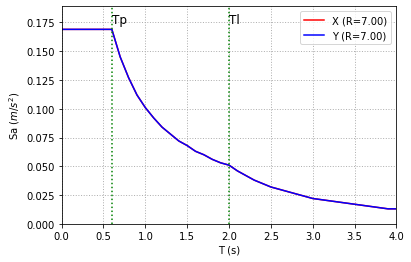

In [12]:
sismo.dinamic_spectrum(report=True)

# Fuerza Cortante Mínima

In [13]:
sismo.min_shear(SapModel,story=sismo.base_story,report=True)

,X,Y
V din (Ton),50.889600,65.187100
V est (Ton),-61.300700,-73.041000
% min,80,80
%,83.020000,89.250000
F.E.,1,1


# Discotinuidad por diafragma

In [14]:
sismo.discontinuidad_diafragma()

# Esquinas Entrantes

In [15]:
sismo.esquinas_entrantes()

## Revisión por Piso Blando

In [16]:
sismo.piso_blando(SapModel,report=True)

Dropdown(description='Filtro', options=('SDx Max', 'SDy Max', 'Sy Max', 'Sx Min', 'Sx Max', 'Sy Min', 'sin fil…

,Story,OutputCase,UX,UY,ΔUX,ΔUY,VX,VY,lat_rig(k),0.7_prev_k,0.8k_prom,is_reg
0,Story8,SDx Max,0.023583,0.000879,0.002284,0.000112,16.9984,0.844,7535.714286,0.000000,0.000000,Regular
1,Story7,SDx Max,0.021299,0.000767,0.002981,0.000108,34.801,1.7267,15987.962963,5275.000000,0.000000,Regular
2,Story6,SDx Max,0.018318,0.000659,0.003436,0.000128,49.2654,2.437,19039.062500,11191.574074,0.000000,Regular
3,Story5,SDx Max,0.014882,0.000531,0.003817,0.000142,60.929,3.0096,21194.366197,13327.343750,11350.063933,Regular
4,Story4,SDx Max,0.011065,0.000389,0.003818,0.000140,70.4907,3.4785,24846.428571,14836.056338,14992.371109,Regular
5,Story3,SDx Max,0.007247,0.000249,0.003535,0.000127,77.4059,3.8097,29997.637795,17392.500000,17354.628605,Regular
6,Story2,SDx Max,0.003712,0.000122,0.002678,0.000099,81.4952,3.9923,40326.262626,20998.346457,20276.915350,Regular
7,Story1,SDx Max,0.001034,2.3E-05,0.001034,0.000023,82.6308,4.0295,175195.652174,28228.383838,25378.754398,Regular


## Revisión por Irregularidad de Masa

In [17]:
sismo.irregularidad_masa(SapModel,report=True)

,Story,Mass,1.5 Mass,story_type,is_regular
0,Story8,6.66875,,Azotea,Regular
1,Story7,8.75356,13.13034,Piso,Regular
2,Story6,8.73707,13.105605,Piso,Regular
3,Story5,8.73903,13.108545,Piso,Regular
4,Story4,9.16343,13.745145,Piso,Regular
5,Story3,9.16343,13.745145,Piso,Regular
6,Story2,9.16343,13.745145,Piso,Regular
7,Story1,7.43363,11.150445,Piso,Regular
8,NT,3.56015,,Sotano,Regular
9,Base,3.91769,,Sotano,Regular


## Revisión de torsión

In [18]:
sismo.irregularidad_torsion(SapModel,report=True)

Dropdown(description='Filtro', options=('Sx Max', 'Sx Min', 'Sy Max', 'Sy Min', 'SDx Max', 'SDy Max', 'sin fil…

,Story,OutputCase,Direction,Max Drift,Avg Drift,Ratio,Height,Drifts,Drift < Dmax/2,tor_reg
0,Story8,Sx Max,X,0.003536,0.003073,1.151,2.5,0.007426,False,Regular
9,Story7,Sx Max,X,0.004079,0.003789,1.077,2.5,0.008566,False,Regular
18,Story6,Sx Max,X,0.004785,0.00436,1.097,2.5,0.010049,False,Regular
27,Story5,Sx Max,X,0.005299,0.004789,1.107,2.5,0.011128,False,Regular
36,Story4,Sx Max,X,0.005457,0.004915,1.11,2.5,0.011460,False,Regular
45,Story3,Sx Max,X,0.005263,0.004659,1.13,2.5,0.011052,False,Regular
54,Story2,Sx Max,X,0.00448,0.00371,1.208,2.5,0.009408,False,Regular
62,Story1,Sx Max,X,0.001341,0.001119,1.199,1.5,0.004693,False,Regular
71,NT,Sx Max,X,0.00032,0.000134,2.387,1.75,0.000960,True,Regular


## Derivas

Dropdown(description='Filtro', options=('Sx Max', 'Sx Min', 'Sy Max', 'Sy Min', 'SDx Max', 'SDy Max', 'sin fil…

,Story,OutputCase,Direction,Height,Drifts,Drift_Check
0,Story8,Sx Max,X,2.5,0.007426,No Cumple
9,Story7,Sx Max,X,2.5,0.008566,No Cumple
18,Story6,Sx Max,X,2.5,0.010049,No Cumple
27,Story5,Sx Max,X,2.5,0.011128,No Cumple
36,Story4,Sx Max,X,2.5,0.011460,No Cumple
45,Story3,Sx Max,X,2.5,0.011052,No Cumple
54,Story2,Sx Max,X,2.5,0.009408,No Cumple
62,Story1,Sx Max,X,1.5,0.004693,Cumple
71,NT,Sx Max,X,1.75,0.000960,Cumple


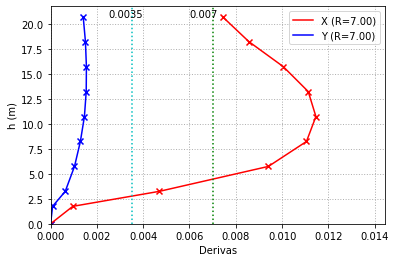

In [19]:
sismo.derivas(SapModel,report=True)

# Desplazamientos Laterales

Dropdown(description='Filtro', options=('Sx Max', 'Sx Min', 'Sy Max', 'Sy Min', 'SDx Max', 'SDy Max', 'sin fil…

,Story,OutputCase,Direction,Maximum,Height
0,Story8,Sx Max,X,0.032768,2.5
9,Story7,Sx Max,X,0.029232,2.5
18,Story6,Sx Max,X,0.025153,2.5
27,Story5,Sx Max,X,0.020404,2.5
36,Story4,Sx Max,X,0.015226,2.5
45,Story3,Sx Max,X,0.009943,2.5
54,Story2,Sx Max,X,0.005057,2.5
63,Story1,Sx Max,X,0.001341,1.5


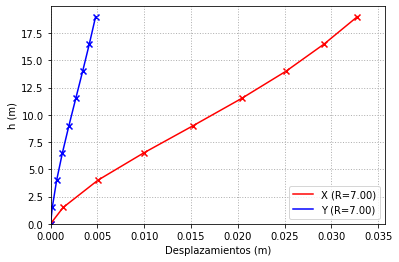

In [20]:
sismo.desplazamientos(SapModel,report=True)

# Centro de Masas e Inercias

In [21]:
#Activar calculate Diaphragm Center of Rigidity en Set Load Cases to Run
sismo.centro_masa_inercia(SapModel,report=True)

,Story,XCCM,XCR,YCCM,YCR,DifX,DifY
0,Story8,2.3976,1.7379,-9.6781,-10.0923,0.6597,0.4142
1,Story7,2.3794,1.739,-9.3922,-10.0856,0.6404,0.6934
2,Story6,2.3718,1.7351,-9.3176,-10.1248,0.6367,0.8072
3,Story5,2.3688,1.73,-9.2827,-10.1349,0.6388,0.8522
4,Story4,2.3652,1.7334,-9.3152,-10.0882,0.6318,0.7730
5,Story3,2.3629,1.7417,-9.336,-9.9847,0.6212,0.6487
6,Story2,2.3613,1.7636,-9.3505,-9.7004,0.5977,0.3499
7,Story1,2.338,1.7952,-8.9819,-8.7762,0.5428,-0.2057


# Generación de reporte

In [23]:
sismo.generate_memoria()

KeyError: 'A1 no aislado'